In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import tensorflow
import keras

In [2]:
nutrition = pd.read_pickle("./Nutrition_Full_Features.pkl")
nutrition

,name,Food Group,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq per 100g),...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,63.0,4530.0,1445.0,12.0,0.0,7.0,0.0,0.0
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,66.0,5292.0,1502.0,13.0,0.0,8.0,0.0,0.0
5,Dutch Apple Pie,Baked Foods,2.80,500.0,0.560000,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,1.0,42.0,5797.0,2117.0,0.0,0.0,0.0,0.0,0.0
9,Bread White Wheat,Baked Foods,0.95,800.0,0.118750,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,25.0,393.0,973.0,3.0,0.0,0.0,0.0,0.0
10,Bagels Wheat,Baked Foods,1.60,450.0,0.355556,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,88.0,290.0,936.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,0.90,85.0,1.058824,Other vegetables,0.0310,0.0455,8.3,0.000531,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,Romaine Lettuce Raw,Vegetables,1.00,400.0,0.250000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,Palak Paneer,Vegetables,3.75,500.0,0.750000,Cheese,8.0642,2.1240,473.5,0.014894,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,Carrots Raw Salad,Vegetables,0.41,1000.0,0.041000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [3]:
#Data for features
X = nutrition.iloc[:, 11:]
y = nutrition.iloc[:, 4]


In [4]:
X

,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Saturated Fats (g),Calcium (mg),"Iron, Fe (mg)","Potassium, K (mg)",...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
1,273,9.22,6.58,41.05,4.30,2.2,1.898,279,6.04,126.0,...,0.0,0.0,63.0,4530.0,1445.0,12.0,0.0,7.0,0.0,0.0
2,309,9.49,7.42,48.39,4.41,2.6,2.275,299,6.59,138.0,...,0.0,0.0,66.0,5292.0,1502.0,13.0,0.0,8.0,0.0,0.0
5,290,11.50,2.17,44.54,22.02,1.6,2.313,14,0.91,76.0,...,0.0,1.0,42.0,5797.0,2117.0,0.0,0.0,0.0,0.0,0.0
9,238,2.15,10.66,43.91,5.00,9.2,0.630,684,4.89,127.0,...,0.0,0.0,25.0,393.0,973.0,3.0,0.0,0.0,0.0,0.0
10,250,1.53,10.20,48.89,6.12,4.1,0.000,20,2.76,165.0,...,0.0,0.0,88.0,290.0,936.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,241,10.16,1.66,40.60,19.10,2.9,1.507,4,0.78,572.0,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,19,0.27,1.39,3.78,0.71,3.1,0.053,62,0.90,327.0,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,96,6.84,5.23,4.32,1.89,1.2,1.486,70,1.15,269.0,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,208,15.70,1.22,17.17,11.23,2.3,2.452,30,0.49,309.0,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [5]:
y

1       0.264550
2       0.264550
5       0.560000
9       0.118750
10      0.355556
          ...   
1218    1.058824
1219    0.250000
1220    0.750000
1221    0.041000
1222    0.171429
Name: Price per Weight (£/100Gram), Length: 1042, dtype: float64

In [6]:
# command/
#only normalising X not y. Is this right?
# norm_X = preprocessing.normalize(X, axis=0) #collum instead of row
# norm_X = pd.DataFrame(norm_X, columns = X.columns)
# X=norm_X
# X

In [7]:
y = np.ravel(y)
X = X.values

In [8]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [9]:
from keras.layers import Dense, Activation
from keras.models import Sequential

# Feature Scaling/preprocessing - normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building model
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(16, activation = 'relu', input_dim = 40))

# Adding the second hidden layer
model.add(Dense(units = 8, activation = 'relu'))

#avoids overfitting
#https://keras.io/api/layers/regularization_layers/dropout/
model.add(keras.layers.Dropout(0.1))


# Adding the output layer

model.add(Dense(units = 1))


# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])#metrics tracks values but doesn't decide with it

# Fitting the ANN to the Training set
history = model.fit(X_train, y_train, batch_size = 10, epochs = 100, validation_split=0.3)


Epoch 1/100
59/59 [==============================] - 1s 11ms/step - loss: 2.6379 - accuracy: 0.0031 - val_loss: 205.3625 - val_accuracy: 0.0040
Epoch 2/100
59/59 [==============================] - 0s 2ms/step - loss: 3.1589 - accuracy: 0.0091 - val_loss: 205.1181 - val_accuracy: 0.0120
Epoch 3/100
59/59 [==============================] - 0s 2ms/step - loss: 6.2132 - accuracy: 0.0111 - val_loss: 204.9808 - val_accuracy: 0.0120
Epoch 4/100
59/59 [==============================] - 0s 2ms/step - loss: 1.4849 - accuracy: 0.0064 - val_loss: 204.8344 - val_accuracy: 0.0120
Epoch 5/100
59/59 [==============================] - 0s 2ms/step - loss: 3.6793 - accuracy: 0.0092 - val_loss: 204.8093 - val_accuracy: 0.0120
Epoch 6/100
59/59 [==============================] - 0s 2ms/step - loss: 3.0591 - accuracy: 0.0199 - val_loss: 204.7752 - val_accuracy: 0.0120
Epoch 7/100
59/59 [==============================] - 0s 2ms/step - loss: 2.5128 - accuracy: 0.0168 - val_loss: 204.7018 - val_accuracy: 0.012

Epoch 58/100
59/59 [==============================] - 0s 2ms/step - loss: 0.9173 - accuracy: 0.0042 - val_loss: 205.1146 - val_accuracy: 0.0080
Epoch 59/100
59/59 [==============================] - 0s 2ms/step - loss: 1.3397 - accuracy: 0.0068 - val_loss: 205.0632 - val_accuracy: 0.0080
Epoch 60/100
59/59 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.0037 - val_loss: 205.1537 - val_accuracy: 0.0080
Epoch 61/100
59/59 [==============================] - 0s 2ms/step - loss: 1.3833 - accuracy: 0.0187 - val_loss: 205.1646 - val_accuracy: 0.0080
Epoch 62/100
59/59 [==============================] - 0s 2ms/step - loss: 0.7320 - accuracy: 0.0073 - val_loss: 205.1731 - val_accuracy: 0.0080
Epoch 63/100
59/59 [==============================] - 0s 2ms/step - loss: 0.7485 - accuracy: 0.0158 - val_loss: 205.1714 - val_accuracy: 0.0080
Epoch 64/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.0102 - val_loss: 205.2626 - val_accuracy:

Parameters involved:
    https://keras.io/api/models/model_training_apis/

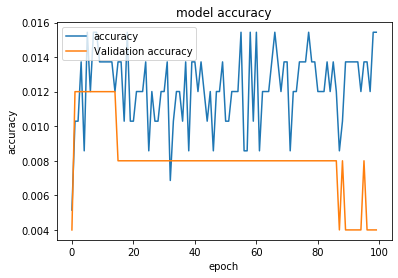

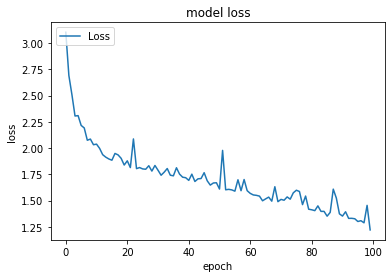

In [10]:
#plot learning curves

#accuracy no idea what this is for
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'Validation accuracy'], loc='upper left')
plt.show()

#loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Loss'], loc='upper left')#, 'Validation Loss'
plt.show()

In [11]:
#model evaluation
score = model.evaluate(X_test, y_test)[1]
score2= model.evaluate(X_test, y_test)[0]

7/7 [==============================] - 0s 1ms/step - loss: 0.6479 - accuracy: 0.0144


In [12]:
print('Accuracy without tuning: {}'.format(score))
print('Loss without tuning: {}'.format(score2))

Accuracy without tuning: 0.014354066923260689
Loss without tuning: 0.6478997468948364


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                656       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


https://keras.io/api/models/sequential/
The Sequential Class, provides a training and inference features on this model

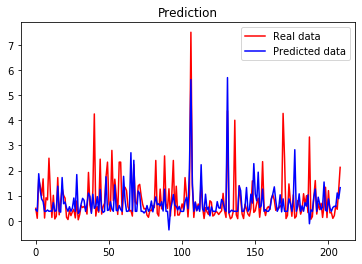

In [14]:
y_pred = model.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

cite: https://stackoverflow.com/questions/49008074/how-to-create-a-neural-network-for-regression

In [15]:
#Why are my errors all of a sudden so because of overfitting?
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.48475897530961326
Mean Squared Error: 0.6478996602952629
Root Mean Squared Error: 0.8049221454869179


# Now Hyperparameter tuning

In [28]:
import kerastuner
from kerastuner import HyperModel

def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units', min_value=8, max_value=32, step=4), 
        activation = hp.Choice('dense_activation', 
                values=['relu', 'tanh','sigmoid']),#,'softmax']),
        input_dim = 40
        )
             
    )

    model.add(Dense(
        units=hp.Int('units', min_value=8, max_value=32, step=4), 
        activation = hp.Choice('dense_activation', 
                values=['relu', 'tanh','sigmoid'])#,'softmax'])
        )
             
    )
    
    model.add(
        keras.layers.Dropout(
            hp.Float(
                    'dropout',
                    min_value=0.01,
                    max_value=0.1,
                    step=0.01)
        )
    )

    # Adding the output layer
    model.add(Dense(units = 1))


    model.compile(
        #optimizer='adam',
        optimizer = hp.Choice('dense_optimizer',
                values=['adam']),#'SGD','rmsprop','adadelta'] ),
        loss = 'mean_squared_error',
        metrics = ['accuracy']
    )
    return model

In [29]:
tuner_rs = kerastuner.tuners.RandomSearch(
            build_model,
            objective='loss',
            max_trials=4,
            executions_per_trial=2, overwrite=True)

In [30]:
tuner_rs.search(X_train, y_train, epochs=50) #, verbose=0)

Trial 4 Complete [00h 00m 05s]
loss: 59.481157302856445

Best loss So Far: 59.481157302856445
Total elapsed time: 00h 00m 21s
INFO:tensorflow:Oracle triggered exit


In [19]:
#best_model = tuner_rs.get_best_models(num_models=1)
#best_model = tuner_rs.get_best_models(num_models=1)[0]
#mse_rs = best_model.evaluate(X_test, y_test)[1]

In [20]:
#loss, mse = best_model.evaluate(X_test, y_test)

In [21]:
#collect best hyperparameters to rebuild model
best_model = tuner_rs.get_best_hyperparameters()[0]
model = tuner_rs.hypermodel.build(best_model)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                492       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Training the Model
history = model.fit(X_train, y_train, batch_size = 10, epochs = 100, validation_split=0.3, verbose = 0)

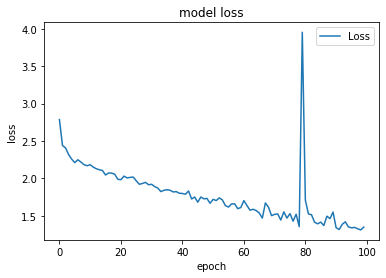

In [23]:
#loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [24]:
# get new predicted values with Hyperparameters
y_best_model_pred = model.predict(X_test)

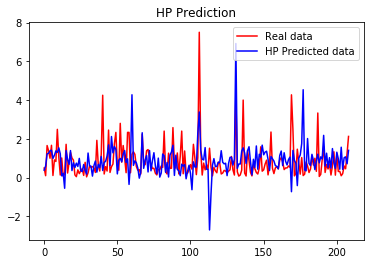

In [25]:
# plot predicted values against test values
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_best_model_pred, color = 'blue', label = 'HP Predicted data')
plt.title('HP Prediction')
plt.legend(loc='upper right')
plt.show()

In [26]:
# checking the output metrics
from sklearn import metrics

y_hp_pred=y_best_model_pred

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hp_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hp_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hp_pred)))

y_mean = np.mean(y_hp_pred)
y_std = np.std(y_hp_pred)
print('Output Standard Deviation:', y_std)
print('Output Mean:', y_mean)

Mean Absolute Error: 0.663734823631872
Mean Squared Error: 1.0242083512007414
Root Mean Squared Error: 1.01203179357209
Output Standard Deviation: 0.8064375
Output Mean: 0.8861913


In [27]:
tuner_rs.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='loss', direction='min')
Trial summary
Hyperparameters:
units: 12
dense_activation: tanh
dropout: 0.04
dense_optimizer: SGD
Score: 59.29666519165039
Trial summary
Hyperparameters:
units: 24
dense_activation: relu
dropout: 0.09
dense_optimizer: rmsprop
Score: 61.06418418884277
Trial summary
Hyperparameters:
units: 20
dense_activation: sigmoid
dropout: 0.09
dense_optimizer: rmsprop
Score: 62.68609809875488
Trial summary
Hyperparameters:
units: 12
dense_activation: sigmoid
dropout: 0.09
dense_optimizer: rmsprop
Score: 62.746578216552734
